In [1]:
# The imports
import pickle as pkl
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
import datasets 
import networkx as nx
reload(nx)
%matplotlib inline

In [70]:
# Load the data
dataset = datasets.PercolateDataset(graph_dir='../Dataset/SyntheticData/')


In [433]:
import monitoring
reload(monitoring)

my_file = "../testing123/dataset=percolate_add_self=True_prune_graph=False_num_channel=32_seed=1993_use_gate=0.0001_weight_decay=0.0001_l1_loss=0.0_num_layer=5_scale_free=False_skip_connections=False_lr=0.003_percentile=100_norm_adj=False_model=cgn_momentum=0.9_use_emb=32"
features, graphs, reps = monitoring.load_everything(my_file)

Loading the data...
Done!


Showing example 0, Answer: 1, prediction: 1


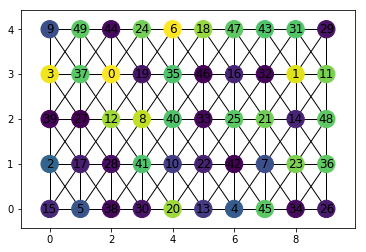

gate 1, from [0.421874076128, 0.663813114166]


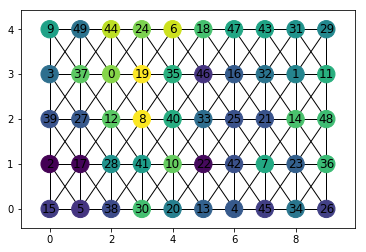

gate 2, from [0.443955093622, 0.671388447285]


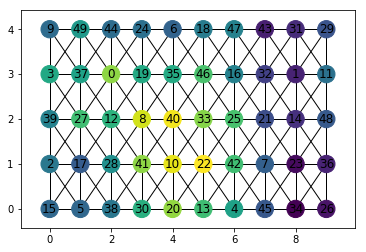

gate 3, from [0.309685528278, 0.926392495632]


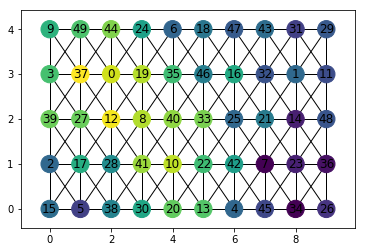

gate 4, from [0.283914715052, 0.989099264145]


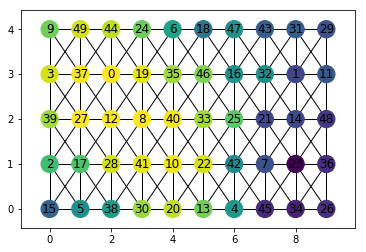

gate 5, from [0.0260401684791, 0.993819534779]


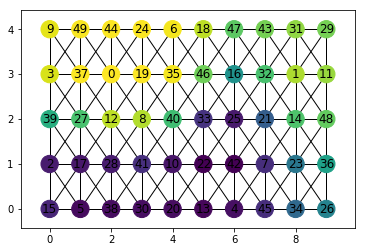

Showing example 0, Answer: 1, prediction: 1
Showing example 1, Answer: 1, prediction: 1


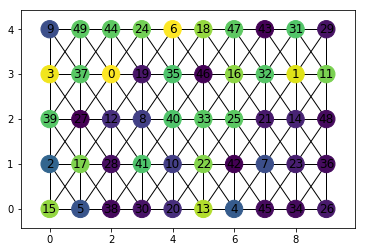

gate 1, from [0.367974966764, 0.645311892033]


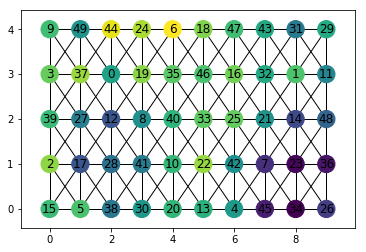

gate 2, from [0.485436797142, 0.65942555666]


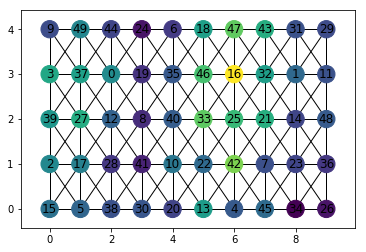

gate 3, from [0.419941306114, 0.965864419937]


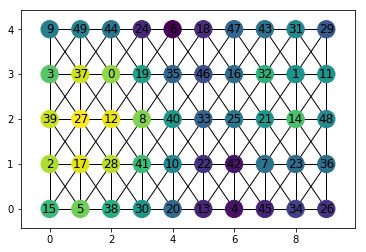

gate 4, from [0.433337330818, 0.997175097466]


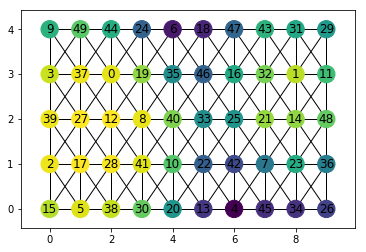

gate 5, from [0.037085659802, 0.99647384882]


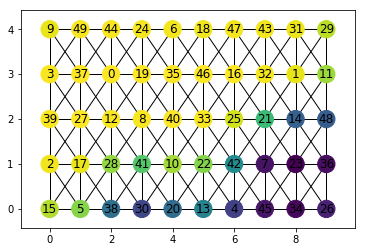

Showing example 1, Answer: 1, prediction: 1
Showing example 2, Answer: 1, prediction: 1


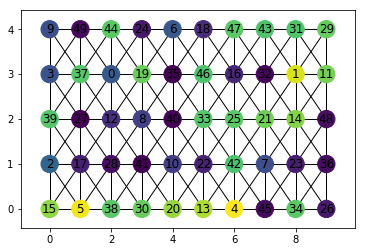

gate 1, from [0.368606120348, 0.676993787289]


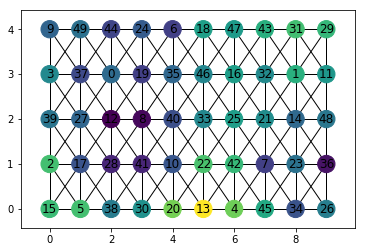

gate 2, from [0.45333173871, 0.622052609921]


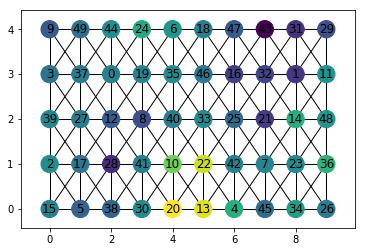

gate 3, from [0.437150329351, 0.866267085075]


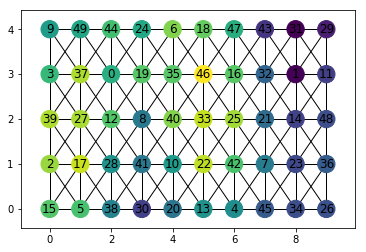

gate 4, from [0.455619841814, 0.988341629505]


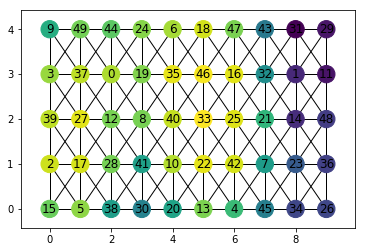

gate 5, from [0.00840086955577, 0.955948293209]


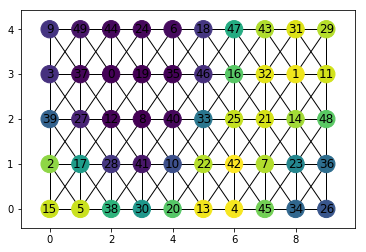

Showing example 2, Answer: 1, prediction: 1
Showing example 3, Answer: 1, prediction: 1


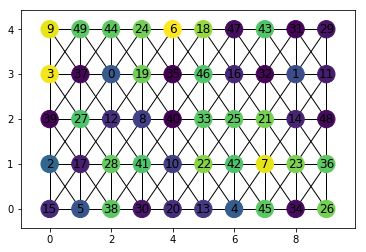

gate 1, from [0.420130372047, 0.652064919472]


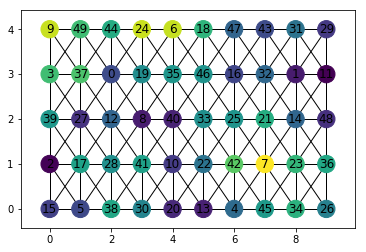

gate 2, from [0.42540872097, 0.614530682564]


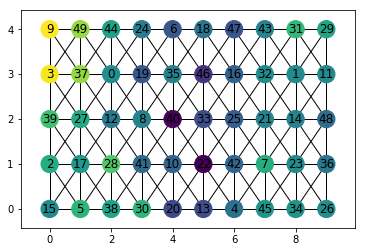

gate 3, from [0.22024281323, 0.843351304531]


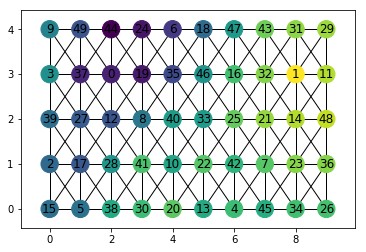

gate 4, from [0.282529085875, 0.966670930386]


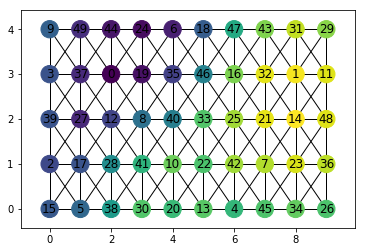

gate 5, from [0.0346053093672, 0.963983535767]


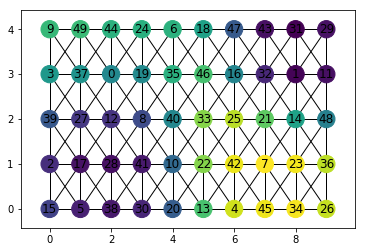

Showing example 3, Answer: 1, prediction: 1
Showing example 4, Answer: 0, prediction: 0


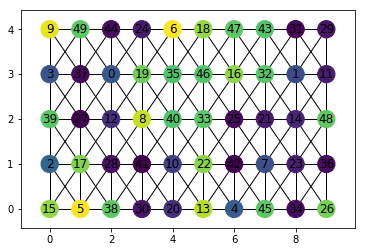

gate 1, from [0.372490227222, 0.644099056721]


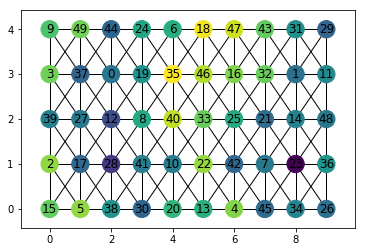

gate 2, from [0.521783769131, 0.649949491024]


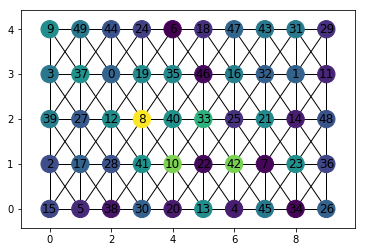

gate 3, from [0.368836820126, 0.946591317654]


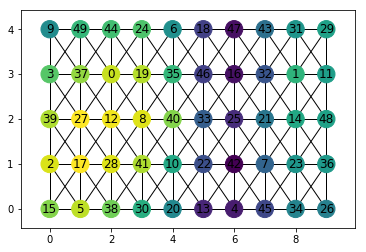

gate 4, from [0.38590541482, 0.996238827705]


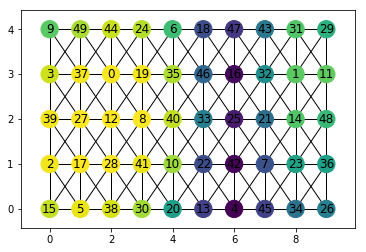

gate 5, from [0.0130162565038, 0.993827164173]


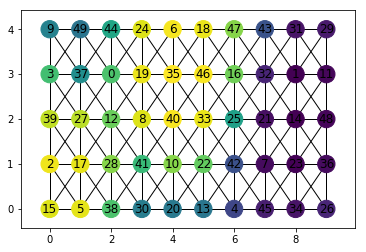

Showing example 4, Answer: 0, prediction: 0
Showing example 5, Answer: 0, prediction: 0


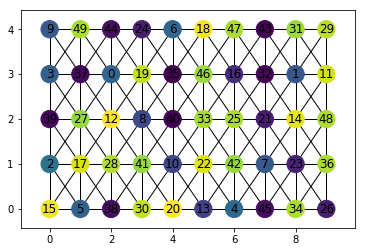

gate 1, from [0.416230499744, 0.626788079739]


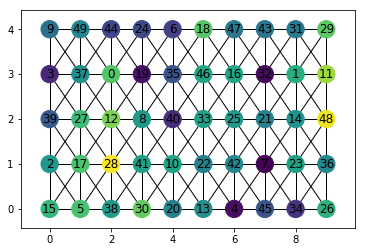

gate 2, from [0.438155144453, 0.590851843357]


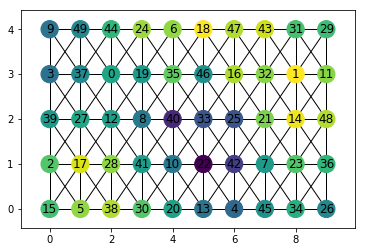

gate 3, from [0.232979565859, 0.892320930958]


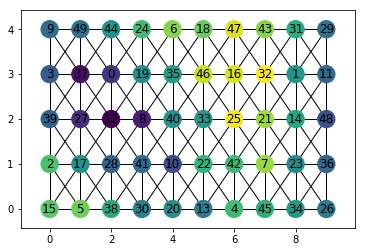

gate 4, from [0.331829994917, 0.993054807186]


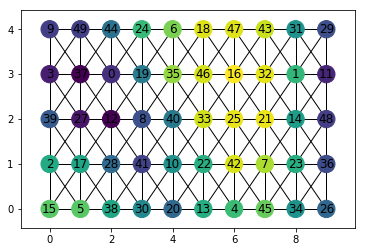

gate 5, from [0.0300203878433, 0.889250159264]


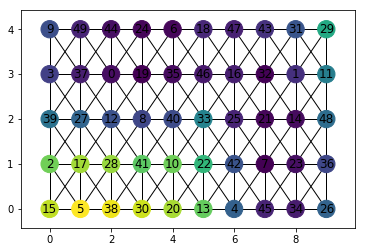

Showing example 5, Answer: 0, prediction: 0
Showing example 6, Answer: 1, prediction: 1


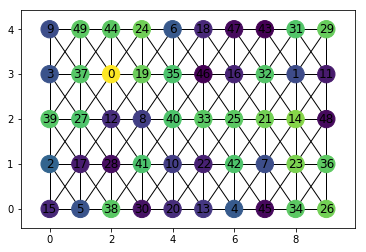

gate 1, from [0.40087211132, 0.634816527367]


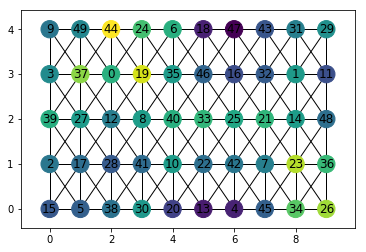

gate 2, from [0.473828941584, 0.613717913628]


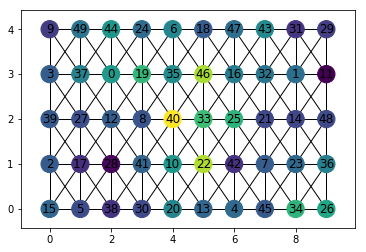

gate 3, from [0.360705584288, 0.936579167843]


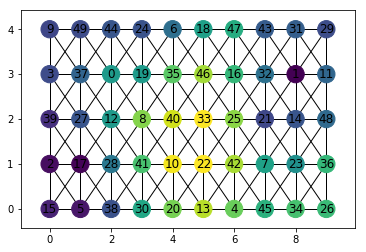

gate 4, from [0.412652164698, 0.996981918812]


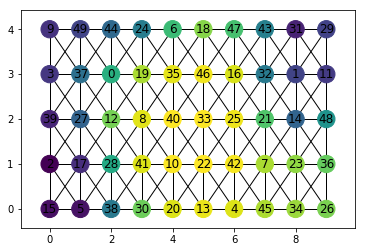

gate 5, from [0.0831857100129, 0.991718530655]


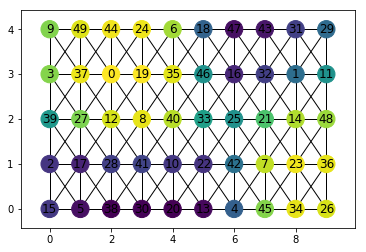

Showing example 6, Answer: 1, prediction: 1
Showing example 7, Answer: 0, prediction: 0


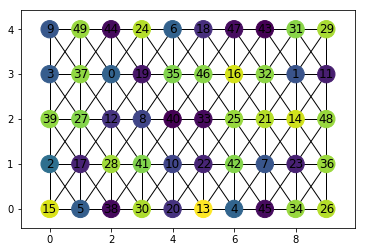

gate 1, from [0.410213410854, 0.601714491844]


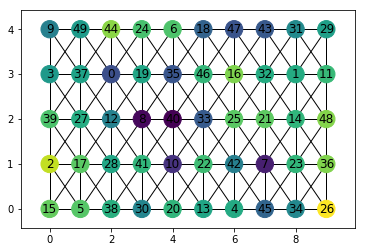

gate 2, from [0.442245870829, 0.580813109875]


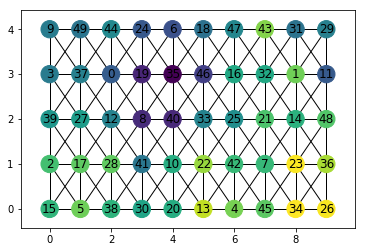

gate 3, from [0.223739698529, 0.760629117489]


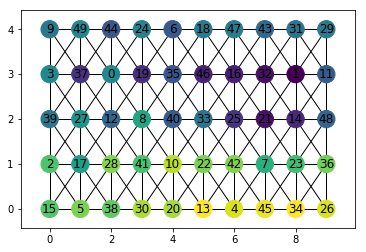

gate 4, from [0.236919045448, 0.910129368305]


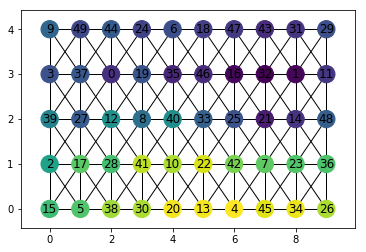

gate 5, from [0.0199277028441, 0.813657701015]


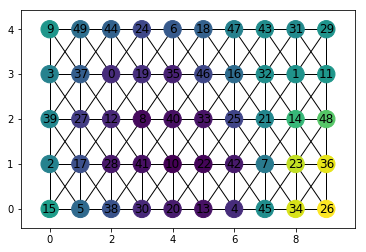

Showing example 7, Answer: 0, prediction: 0
Showing example 8, Answer: 0, prediction: 0


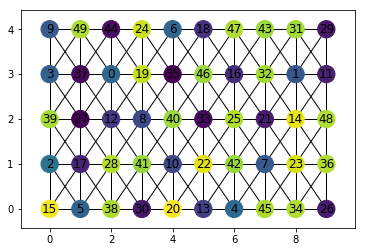

gate 1, from [0.434977680445, 0.628080964088]


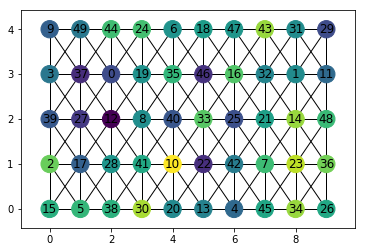

gate 2, from [0.45012897253, 0.592534005642]


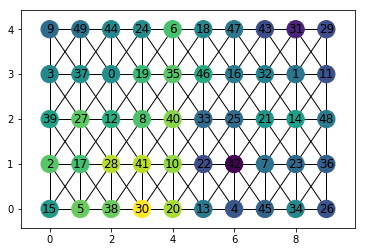

gate 3, from [0.276813387871, 0.857160508633]


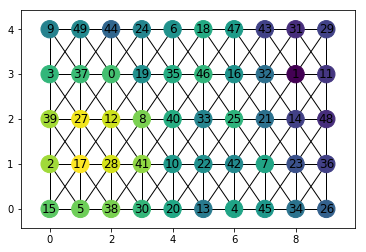

gate 4, from [0.353394329548, 0.979362130165]


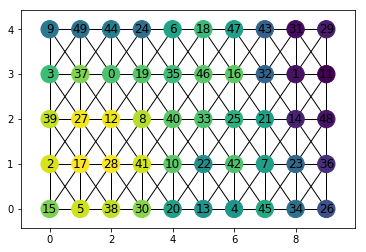

gate 5, from [0.0452204085886, 0.798659920692]


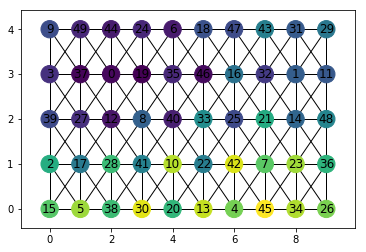

Showing example 8, Answer: 0, prediction: 0
Showing example 9, Answer: 0, prediction: 0


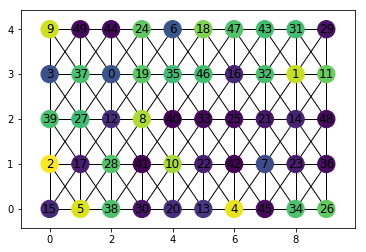

gate 1, from [0.39554387331, 0.624225437641]


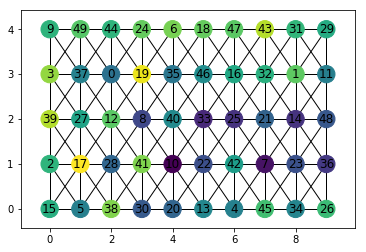

gate 2, from [0.4759965837, 0.605975151062]


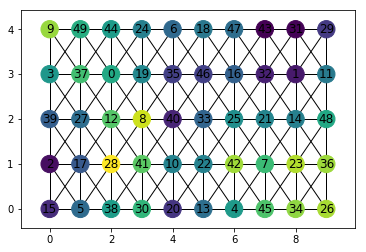

gate 3, from [0.275623589754, 0.860369265079]


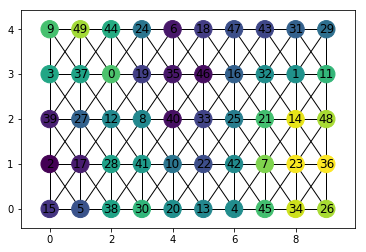

gate 4, from [0.311742216349, 0.9783898592]


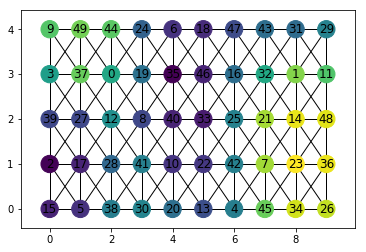

gate 5, from [0.0199540387839, 0.89161491394]


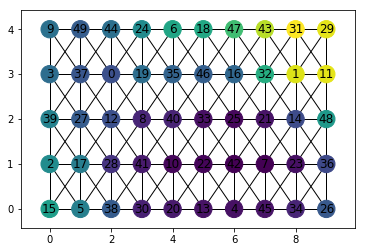

Showing example 9, Answer: 0, prediction: 0


In [435]:
def show_one(adj, node_color):
    
    # Hard coding the position, sorry.
    order = np.array([[15, 2, 39, 3, 9],
                 [5, 17, 27, 37, 49],
                 [38, 28, 12, 0, 44],
                 [30, 41, 8, 19, 24],
                 [20, 10, 40, 35, 6],
                 [13, 22, 33, 46, 18],
                 [4, 42, 25, 16, 47],
                 [45, 7, 21, 32, 43],
                 [34, 23, 14, 1, 31],
                 [26, 36, 48, 11, 29]])

    pos = [np.argwhere(order == i)[0] for i in range(order.shape[0] * order.shape[1])]
    
    nb_nodes = graph.shape[0]
    np.fill_diagonal(adj, 0.)
    G = nx.Graph(graph)
    nx.draw_networkx(G, pos, nodelist=range(nb_nodes), node_color=node_color)
    plt.show()
    
def show_representation(rep, graphs, idx=0):
    
    first_graph = graphs[0][0]
    
    answer = int(rep['example']['output'][idx])
    pred = np.argmax(rep['logistic']['output'][idx])
    
    #if answer == pred:
    #    return
    
    print "Showing example {}, Answer: {}, prediction: {}".format(idx,
                                                                  answer, 
                                                                  pred)
    show_one(first_graph, rep['example']['input'][idx, :, 0]) # The input
    
    for i in range(len(graphs)):
        graph = graphs[i][0]
        color = reps['gate_{}'.format(i)]['output'][idx, :, 0]
        print "gate {}, from [{}, {}]".format(i+1, np.min(reps['gate_{}'.format(i)]['output'][idx, :, 0]),
                                             np.max(reps['gate_{}'.format(i)]['output'][idx, :, 0]))
        show_one(first_graph, color) # The input
        
    print "Showing example {}, Answer: {}, prediction: {}".format(idx,
                                                                  answer, 
                                                                  pred)
    

for i in range(10): 
    show_representation(reps, graphs, i)

In [383]:
pos

[array([2, 3]),
 array([8, 3]),
 array([0, 1]),
 array([0, 3]),
 array([6, 0]),
 array([1, 0]),
 array([4, 4]),
 array([7, 1]),
 array([3, 2]),
 array([0, 4]),
 array([4, 1]),
 array([9, 3]),
 array([2, 2]),
 array([5, 0]),
 array([8, 2]),
 array([0, 0]),
 array([6, 3]),
 array([1, 1]),
 array([5, 4]),
 array([3, 3]),
 array([4, 0]),
 array([7, 2]),
 array([5, 1]),
 array([8, 1]),
 array([3, 4]),
 array([6, 2]),
 array([9, 0]),
 array([1, 2]),
 array([2, 1]),
 array([9, 4]),
 array([3, 0]),
 array([8, 4]),
 array([7, 3]),
 array([5, 2]),
 array([8, 0]),
 array([4, 3]),
 array([9, 1]),
 array([1, 3]),
 array([2, 0]),
 array([0, 2]),
 array([4, 2]),
 array([3, 1]),
 array([6, 1]),
 array([7, 4]),
 array([2, 4]),
 array([7, 0]),
 array([5, 3]),
 array([6, 4]),
 array([9, 2]),
 array([1, 4])]

Checking the pooling
All of them:


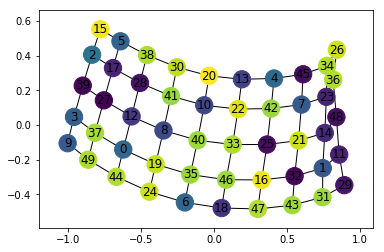

[ 0.61406064  0.10610093  0.40244272  0.25010931  0.1931396   0.53693527
  0.47846156  0.38422981  0.563214    0.41788673  0.82183534  0.06827947
  0.07086447  0.60904169  0.18543893  0.58093536  0.66078758  0.10898793
  0.47409534  0.77280015  0.54309618  0.15278165  0.44573575  0.29151821
  0.84033525  0.84167427  0.84335625  0.09327067  0.20180167  0.24668081
  0.861081    0.4454574   0.77763927  0.74044049  0.48826054  0.84984368
  0.57137161  0.44634467  0.47664085  0.15741326  0.5316745   0.35554418
  0.34032598  0.69589919  0.82559115  0.22871472  0.76245284  0.74225181
  0.13969208  0.70324743]


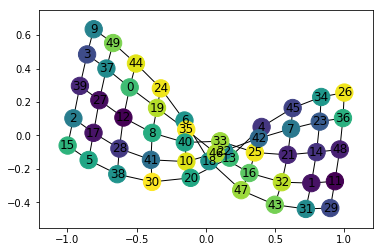

[ 0.90686733  0.62879038  0.39697459  0.25765812  0.35360512  0.49183592
  0.94098157  0.22616328  0.61508322  0.49994862  0.64238781  0.23314291
  0.40322533  0.47185728  0.18470524  0.54692268  0.99250925  0.31218648
  0.81220293  0.98654395  0.93885767  0.89927584  0.8261981   0.35432705
  0.9827503   0.8944509   0.7433306   0.20671727  0.2465986   0.33453125
  0.73747462  0.4439052   0.86178833  0.91988492  0.55877894  0.95326346
  0.62798804  0.50166404  0.7205689   0.27538073  0.94703847  0.86302543
  0.65500528  0.92108417  0.97802269  0.29386091  0.95857435  0.84267467
  0.34033784  0.82261014]


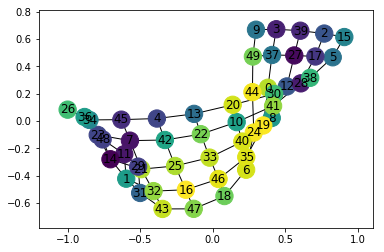

[  1.58499628e-01   2.34774023e-01   8.04722011e-01   7.96289206e-01
   3.47661167e-01   6.71609461e-01   1.30473748e-02   5.27528465e-01
   1.41211189e-02   6.91159785e-01   8.97997583e-04   6.25220001e-01
   3.36562246e-01   3.05819996e-02   6.52326524e-01   7.99159527e-01
   5.22220333e-04   8.07535052e-01   6.64249063e-03   8.17530788e-03
   1.95153151e-02   6.21291026e-02   3.70914489e-03   8.82327795e-01
   2.63012499e-02   2.55587231e-03   8.14683437e-01   7.74383307e-01
   2.82022297e-01   4.66151804e-01   2.45308969e-02   1.84859365e-01
   8.40131473e-03   2.60592846e-04   8.68936539e-01   9.84632061e-04
   8.71277809e-01   5.96166968e-01   3.45317125e-01   7.50393510e-01
   1.16153108e-03   2.94930339e-02   3.77516523e-02   1.42534189e-02
   1.14182644e-01   7.40341365e-01   4.25759761e-04   4.03579790e-03
   7.41111040e-01   6.15161598e-01]


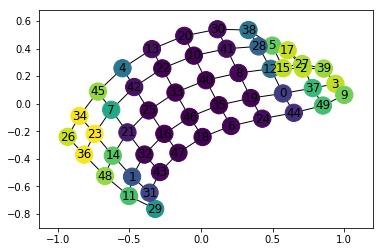

In [362]:
print "Checking the pooling"
print "All of them:"
no = 4

for i in range(1):
    graph = graphs[i][0]
    
    #np.fill_diagonal(graph, 0)
    
    x, gate = gates[i]
    gate = x[no].sum(axis=1)
    nb_nodes = graph.shape[0]
    
    G = nx.Graph(graph)
    positionsG = {}
    for node in G.nodes():
        positionsG[node] = np.array([node%np.sqrt(nb_nodes), node/np.sqrt(nb_nodes)], dtype='float32')
    
    #gate = ['r' if x[j][0] == 1 else 'b' for j in range(x.shape[0])]
    nx.draw_networkx(G, nodelist=range(nb_nodes), node_color=gate )
    plt.show()
    
    graph = (graph.dot(graph) > 0).astype(int)

for i in range(len(gates)):
    graph = graphs[i][0]
    
    #np.fill_diagonal(graph, 0)
    
    x, gate = gates[i]
    gate = gate[no, :, 0]
    nb_nodes = graph.shape[0]
    
    G = nx.Graph(graph)
    positionsG = {}
    for node in G.nodes():
        positionsG[node] = np.array([node%np.sqrt(nb_nodes), node/np.sqrt(nb_nodes)], dtype='float32')
    
    print gate
    nx.draw_networkx(G, nodelist=range(nb_nodes), node_color=gate )
    plt.show()
    
    graph = (graph.dot(graph) > 0).astype(int)
    
# print "Base on the first"
# for i in range(len(graphs)):
#     graph = graphs[0][0]
    
#     #np.fill_diagonal(graph, 0)
    
#     to_keep = graphs[i][1]
#     nb_nodes = graph.shape[0]
    
#     G = nx.Graph(graph)
#     positionsG = {}
#     #for node in G.nodes():
#     #    print node
#     #    positionsG[node] = np.array([node%np.sqrt(nb_nodes), node/np.sqrt(nb_nodes)], dtype='float32')
        
#     nx.draw_spring(G, nodelist=range(nb_nodes), node_color=to_keep + 0.5)
#     plt.show()
    
#     graph = (graph.dot(graph) > 0).astype(int)

Layer 0
Pos


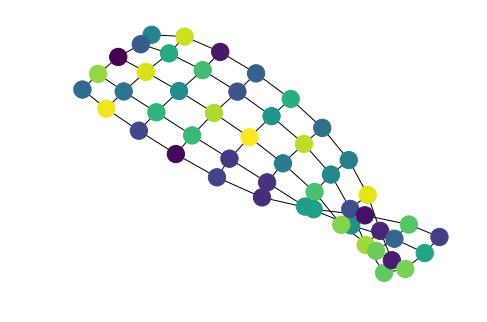

Layer 1
Pos


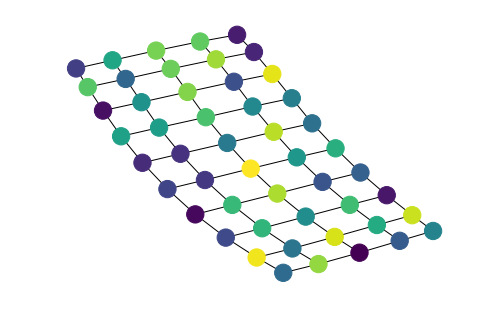

Layer 2
Pos


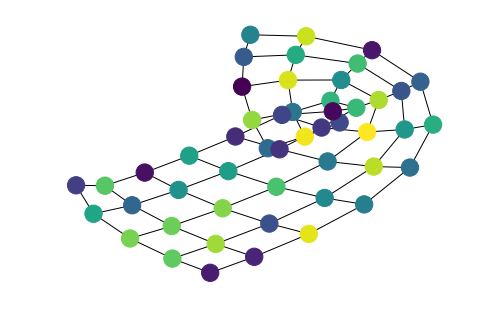

Layer 3
Pos


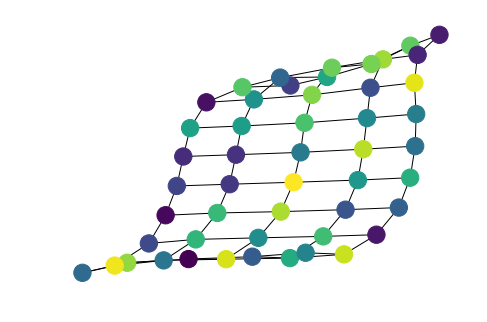

Layer 4
Pos


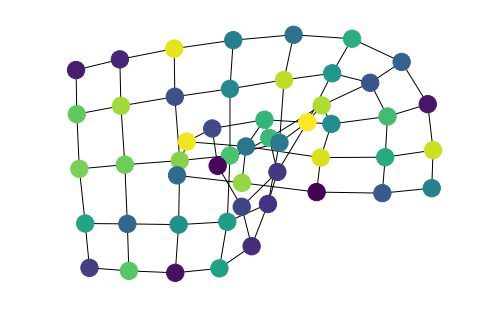

Layer 5
Pos


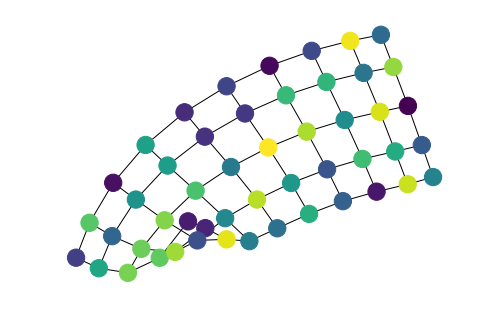

Layer 6
Pos


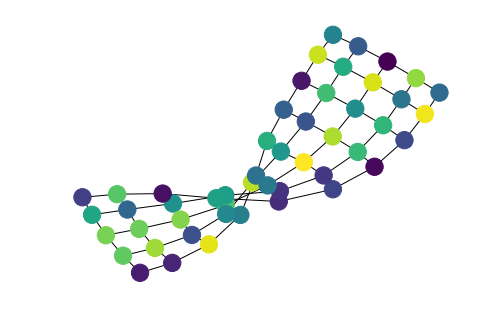

Layer 7
Pos


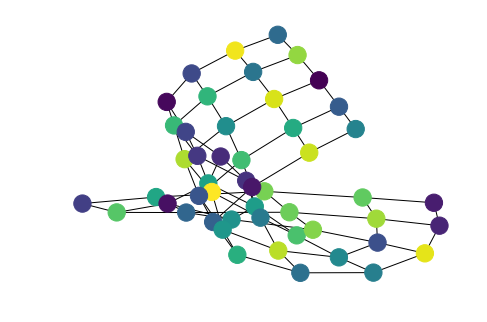

Layer 8
Pos


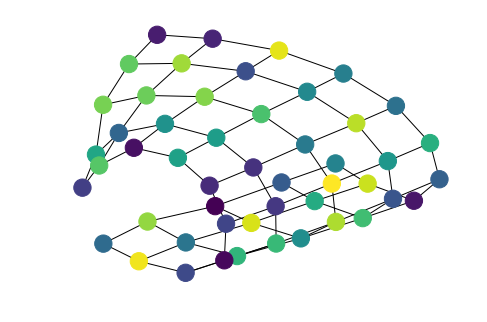

Layer 9
Pos


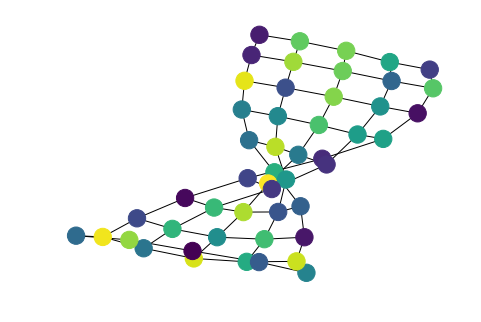

In [284]:
for i, [g, to_keep] in enumerate(graphs):
    
    print "Layer", i
    print "Pos"
    G = nx.Graph(g)
    nx.draw_spring(G, nodelist=range(nb_nodes), node_color= [features[0]['pos'][0][x]/float(nb_nodes) if to_keep[x] else 0 for x in range(nb_nodes)])
    plt.show()

    #print "Neg"
    #nx.draw_networkx(G, nodelist=range(nb_nodes), node_color= [features[0]['neg'][0][x]/float(nb_nodes) if to_keep[x] else 0 for x in range(nb_nodes)])
    #plt.show()